# Titanic Dataset from Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# Load the titanic dataset into a Pandas DataFrame
titanic_dataset = sns.load_dataset('titanic')

# Print Data Type
print("Data Type: ", type(titanic_dataset))

# Print First 5 Rows of the data set
print(titanic_dataset.head())


Data Type:  <class 'pandas.core.frame.DataFrame'>
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
#Create a new column called is_child, which is derived using 'age' column
titanic_dataset['is_child'] = titanic_dataset["age"].apply(lambda age: True if age < 18 else False)
print("Data Frame After adding a new column")
print(titanic_dataset.head())

Data Frame After adding a new column
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  is_child  
0    man        True  NaN  Southampton    no  False     False  
1  woman       False    C    Cherbourg   yes  False     False  
2  woman       False  NaN  Southampton   yes   True     False  
3  woman       False    C  Southampton   yes  False     False  
4    man        True  NaN  Southampton    no   True     False  


In [4]:
#Concatenate a new row in the data frame
new_row = pd.DataFrame({"surived":[0], "pclass" : [1], "sex" : ["male"], "age" : [72], "sibsp": [1], "parch" : [0], "fare" : [126.00], "embarked" : ["S"], "class" : ["First"], "who" : ["man"],
                        "adult_male" : [True], "deck" : [None], "embark_town" : ["Richmond"], "alive" : ["no"], "alone" : [False], "is_child" : [False]})

titanic_concatenated_data_set = pd.concat([titanic_dataset, new_row], ignore_index=True)
print("Concatenated DataFrame:\n")
print(titanic_concatenated_data_set.tail())


Concatenated DataFrame:

     survived  pclass     sex   age  sibsp  parch    fare embarked  class  \
887       1.0       1  female  19.0      0      0   30.00        S  First   
888       0.0       3  female   NaN      1      2   23.45        S  Third   
889       1.0       1    male  26.0      0      0   30.00        C  First   
890       0.0       3    male  32.0      0      0    7.75        Q  Third   
891       NaN       1    male  72.0      1      0  126.00        S  First   

       who  adult_male deck  embark_town alive  alone  is_child  surived  
887  woman       False    B  Southampton   yes   True     False      NaN  
888  woman       False  NaN  Southampton    no  False     False      NaN  
889    man        True    C    Cherbourg   yes   True     False      NaN  
890    man        True  NaN   Queenstown    no   True     False      NaN  
891    man        True  NaN     Richmond    no  False     False      0.0  


/var/folders/9q/q3zcglms18n6vqmb1vjys8hm0000gn/T/ipykernel_16303/3011189391.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  titanic_concatenated_data_set = pd.concat([titanic_dataset, new_row], ignore_index=True)


In [5]:
# To fix FutureWarning Error on The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

# Remove empty columns before concatenating

new_row_cleaned = new_row.dropna(axis=1, how='all') 

titanic_concatenated_data_set = pd.concat([titanic_dataset, new_row_cleaned], ignore_index=True)
print("Concatenated DataFrame:\n")
print(titanic_concatenated_data_set.tail())

Concatenated DataFrame:

     survived  pclass     sex   age  sibsp  parch    fare embarked  class  \
887       1.0       1  female  19.0      0      0   30.00        S  First   
888       0.0       3  female   NaN      1      2   23.45        S  Third   
889       1.0       1    male  26.0      0      0   30.00        C  First   
890       0.0       3    male  32.0      0      0    7.75        Q  Third   
891       NaN       1    male  72.0      1      0  126.00        S  First   

       who  adult_male deck  embark_town alive  alone  is_child  surived  
887  woman       False    B  Southampton   yes   True     False      NaN  
888  woman       False  NaN  Southampton    no  False     False      NaN  
889    man        True    C    Cherbourg   yes   True     False      NaN  
890    man        True  NaN   Queenstown    no   True     False      NaN  
891    man        True  NaN     Richmond    no  False     False      0.0  


## Descriptive Statistics of Titanic Data Set

In [6]:
# Calculate Basic Statistics 
# Central Tendancy - Mean, Median and Mode
# Mean - Average of Given Values
print("Data Type: ", type(titanic_dataset))
mean_age = titanic_dataset["age"].mean()
print("Mean of Age: ", mean_age)
# Median - Middle value 
median_age = titanic_dataset["age"].median()
print("Median of Age: ", median_age)
# Mode - Most Frequency Occuring Value
mode_age = titanic_dataset["age"].mode()[0]
print("Mode of Age: ", mode_age)



Data Type:  <class 'pandas.core.frame.DataFrame'>
Mean of Age:  29.69911764705882
Median of Age:  28.0
Mode of Age:  24.0


## Measures of Variability: Standard Deviation

In [7]:
# Measures of Dispersion (Variability)

# The most common way to gauge the variability is via Standard Deviation

# Standard Deviation - Measures how much the values in the dataset vary around the mean

std_deviation_age = np.std(titanic_dataset["age"])
print(f"Standard Deviation of Age is {std_deviation_age}")

Standard Deviation of Age is 14.516321150817316


### Quartiles and Percentails

In [8]:
# Percentails - Using NumPy
# dropna function will drop NA values
total_percentail_age_np = np.percentile(titanic_dataset["age"].dropna(), 99)
print(f"99th Percentail of Age using numpy: {total_percentail_age_np}")

quartile1_age_np = np.percentile(titanic_dataset["age"].dropna(), 25)
print(f"First Percentail of Age using numpy: {quartile1_age_np}")

quartile3_age_np = np.percentile(titanic_dataset["age"].dropna(), 75)
print(f"Third Percentail of Age using numpy: {quartile3_age_np}")

99th Percentail of Age using numpy: 65.87
First Percentail of Age using numpy: 20.125
Third Percentail of Age using numpy: 38.0


In [9]:
# Percentails - Using Pandas
# dropna function will drop NA values
total_percentail_age_np = titanic_dataset["age"].quantile(0.99)
print(f"99th Percentail of Age using numpy: {total_percentail_age_np}")

quartile1_age_np = titanic_dataset["age"].quantile(0.25)
print(f"First Percentail of Age using numpy: {quartile1_age_np}")

quartile3_age_np = titanic_dataset["age"].quantile(0.75)
print(f"Third Percentail of Age using numpy: {quartile3_age_np}")

99th Percentail of Age using numpy: 65.87
First Percentail of Age using numpy: 20.125
Third Percentail of Age using numpy: 38.0


In [10]:
# Descriptive Stats of Fares
age_fare_sub_dataset = titanic_dataset[['age', 'fare']]

# Calcualte mean, median and mode of age and fare columns in the titanic data set
print(f'Mean of age and fare', age_fare_sub_dataset.mean())
print(f'Median of age and fare', age_fare_sub_dataset.median())
print(f'Mode of age and fare', age_fare_sub_dataset.mode().iloc[0])

Mean of age and fare age     29.699118
fare    32.204208
dtype: float64
Median of age and fare age     28.0000
fare    14.4542
dtype: float64
Mode of age and fare age     24.00
fare     8.05
Name: 0, dtype: float64


## Data Filtering

In [11]:
# Filter passengers by servived
survivors = titanic_dataset [ titanic_dataset['survived'] == True]

print(survivors.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  is_child  
1  woman       False    C    Cherbourg   yes  False     False  
2  woman       False  NaN  Southampton   yes   True     False  
3  woman       False    C  Southampton   yes  False     False  
8  woman       False  NaN  Southampton   yes  False     False  
9  child       False  NaN    Cherbourg   yes  False      True  


### Multiple Conditions in Data Filtering

In [12]:
female_survivors = titanic_dataset[(titanic_dataset['survived'] == True) & (titanic_dataset['sex'] == 'female')]

print(female_survivors.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  is_child  
1  woman       False    C    Cherbourg   yes  False     False  
2  woman       False  NaN  Southampton   yes   True     False  
3  woman       False    C  Southampton   yes  False     False  
8  woman       False  NaN  Southampton   yes  False     False  
9  child       False  NaN    Cherbourg   yes  False      True  


### Sorting Data

In [13]:
# Sorting survivors by age

sorted_survivors = survivors.sort_values('age')

print(sorted_survivors.head())


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
803         1       3    male  0.42      0      1   8.5167        C   Third   
755         1       2    male  0.67      1      1  14.5000        S  Second   
644         1       3  female  0.75      2      1  19.2583        C   Third   
469         1       3  female  0.75      2      1  19.2583        C   Third   
831         1       2    male  0.83      1      1  18.7500        S  Second   

       who  adult_male deck  embark_town alive  alone  is_child  
803  child       False  NaN    Cherbourg   yes  False      True  
755  child       False  NaN  Southampton   yes  False      True  
644  child       False  NaN    Cherbourg   yes  False      True  
469  child       False  NaN    Cherbourg   yes  False      True  
831  child       False  NaN  Southampton   yes  False      True  


In [14]:
# Sorting by multiple columns - age and pclass

sorted_survivors = survivors.sort_values(['pclass', 'age'], ascending=[False, True]) 

print(sorted_survivors.head())

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
803         1       3    male  0.42      0      1   8.5167        C  Third   
469         1       3  female  0.75      2      1  19.2583        C  Third   
644         1       3  female  0.75      2      1  19.2583        C  Third   
172         1       3  female  1.00      1      1  11.1333        S  Third   
381         1       3  female  1.00      0      2  15.7417        C  Third   

       who  adult_male deck  embark_town alive  alone  is_child  
803  child       False  NaN    Cherbourg   yes  False      True  
469  child       False  NaN    Cherbourg   yes  False      True  
644  child       False  NaN    Cherbourg   yes  False      True  
172  child       False  NaN  Southampton   yes  False      True  
381  child       False  NaN    Cherbourg   yes  False      True  


In [15]:
# Provide a concise summary of the DataFrame
print(titanic_dataset.info())

# Count the number of males and females in the 'sex' column
print(titanic_dataset['sex'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  is_child     891 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(4), object(5)
memory usage: 81.5+ KB
None
sex
male      577
female    314

#### Function calculates basic statistics of all continuous variables

Types of variables that can take on an infinite number of values within a specific range. It provides the count, mean, standard deviation (std), min, max, quartiles in its output

In [16]:
# Generate Descriptive Statistics that summarize a dataset's distribution's central tendency, dispersion, and shape, excluding NaN values
print(titanic_dataset.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [17]:
# Notice how all the categorical columns like 'sex' or 'class' are missing in the output. By default describe() only includes columns with numerical data

print(titanic_dataset.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In the above,

unique - the number of distinct objects in the column
top - most frequest object
freq - How many times the top object appears in the column

### Variablity [Dispersion]

It is extent to which data points defer from the center. 

#### Range

* Range is the difference between the min and max values in the dataset.
* It is sensitive to the outliers; extriemly high or low value can skew the range.

In [18]:
# Calculate the range for the column age

age_range = titanic_dataset['age'].max() - titanic_dataset['age'].min()

print(f"Range of the Age is {age_range}")

Range of the Age is 79.58


#### Interquartile Range (IQR)

The IQR measures statistical dispresion, how far the data points are. It's range within the middle 50% of the data falls. It is a better measure of dispresion than the range because outliers don't affect it.

In [19]:
# calculate the IQR
quartile1_age_np = titanic_dataset["age"].quantile(0.25)
print(f"First Percentail of Age using numpy: {quartile1_age_np}")

quartile3_age_np = titanic_dataset["age"].quantile(0.75)
print(f"Third Percentail of Age using numpy: {quartile3_age_np}")

iqr = quartile3_age_np - quartile1_age_np
print(f"IQR is {iqr}")

First Percentail of Age using numpy: 20.125
Third Percentail of Age using numpy: 38.0
IQR is 17.875


In [20]:
# Calculate for Fare Column

# Calculate the numerical data range for 'fare'
fare_range = titanic_dataset['fare'].max() - titanic_dataset['fare'].min()
print('Fare Range:', fare_range)

# Calculate the IQR for 'fare'
Q1 = titanic_dataset['fare'].quantile(0.25)
Q3 = titanic_dataset['fare'].quantile(0.75)
IQR = Q3 - Q1
print('Fare IQR:', IQR)

median_fare = titanic_dataset['fare'].median()
print('Median Fare:', median_fare)

Fare Range: 512.3292
Fare IQR: 23.0896
Median Fare: 14.4542


### Data Visualization with Matplotlib

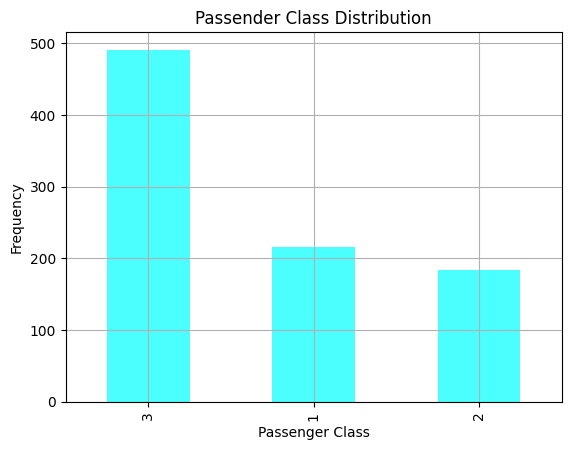

In [21]:
# Passenger Class Distribution

class_data = titanic_dataset['pclass'].value_counts()

class_data.plot(kind = 'bar', color = "aqua", alpha = 0.7, grid = True)
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Passender Class Distribution')
plt.show()

### Handling Missing Data

In [28]:
# Detect missing data

missing_values = titanic_dataset.isnull()
missing_values.head(10)

# Count missing values in each column

missing_values_count = missing_values.sum()
missing_values_count

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
# Drop Rows with Missing Values

titanic_dataset_copy = titanic_dataset.copy()

titanic_dataset_copy.dropna(inplace= True)

# Now recheck the missing values in every column
titanic_dataset_copy.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Visualize Missing Data using Seaborn

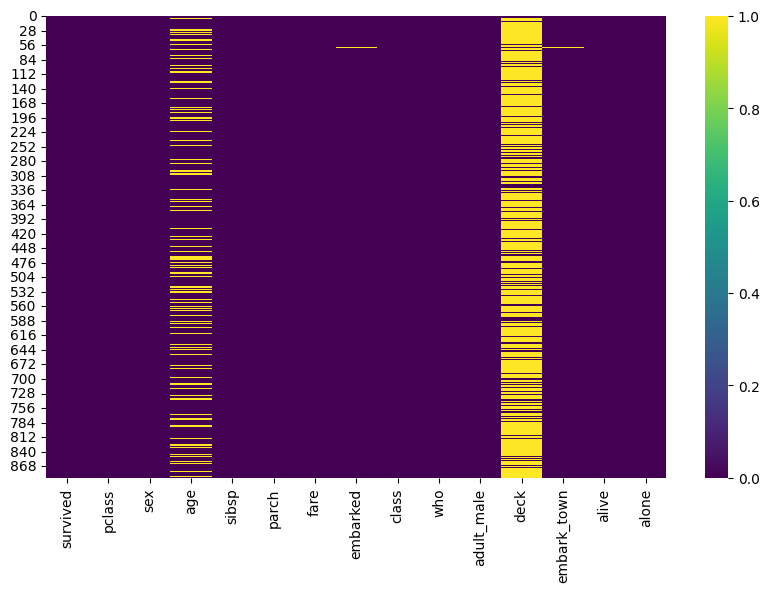

In [31]:
plt.figure(figsize=(10, 6))

sns.heatmap(data=titanic_dataset.isnull(), cmap='viridis' )

plt.show()

### Handle Missing Values - Imputation

In [36]:
# Check the missing values in each column before imputation
print(f"Missing values in age column before imputation {titanic_dataset['age'].isnull().sum()}")

# Impute age using the mean values

titanic_dataset['age'] = titanic_dataset['age'].fillna(titanic_dataset['age'].mean())

# Check the missing values in each column after imputation
print(f"Missing values in age column after imputation {titanic_dataset['age'].isnull().sum()}")


Missing values in age column before imputation 177
Missing values in age column after imputation 0


### Handling categorial values

In [37]:
print(titanic_dataset['sex'].unique())

['male' 'female']


In [38]:
print(titanic_dataset['embark_town'].unique())

['Southampton' 'Cherbourg' 'Queenstown' nan]


### Label Encoding with Pandas

In [42]:
# Label Enconding for Sex
titanic_dataset['sex_encoded'] = pd.factorize(titanic_dataset['sex'])[0]
titanic_dataset[['sex', 'sex_encoded']].head(10)

,sex,sex_encoded
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


### One-hot Encoding with Pandas

In [43]:
encoded_df = pd.get_dummies(titanic_dataset['embark_town'], prefix='town')
titanic_dataset = pd.concat([titanic_dataset, encoded_df], axis= 1)
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encoded,town_Cherbourg,town_Queenstown,town_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,False,False,True


### Data Scaling

#### Standard Scaling: Z-Score

#### Z-Score Formula

The Z-Score formula is used to standardize a data point by determining how many standard deviations it is from the mean. The formula is:

$$
Z = \frac{X - \mu}{\sigma}
$$

Where:
- \( Z \) is the Z-Score
- \( X \) is the value of the data point
- \( \mu \) is the mean of the dataset
- \( \sigma \) is the standard deviation of the dataset

In [51]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

titanic_dataset = sns.load_dataset('titanic').dropna()

# initialize the standard scaler
std_scaler = StandardScaler()

# Fit and transform the age column
titanic_dataset['age_transformed_to_std_scaler'] = std_scaler.fit_transform(np.array(titanic_dataset['age']).reshape(-1, 1))

# Print the transformed column
titanic_dataset[['age','age_transformed_to_std_scaler']].head()



,age,age_transformed_to_std_scaler
1,38.0,0.152082
3,35.0,-0.039875
6,54.0,1.175852
10,4.0,-2.023430
11,58.0,1.431795


#### Min-Max Scaling

Min-Max scaling transforms features by scaling them to a given range, usually between 0 and 1. The formula for Min-Max scaling is:

$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Where:
- \(X\) is the original value
- \(X_{min}\) is the minimum value in the dataset
- \(X_{max}\) is the maximum value in the dataset
- \(X'\) is the scaled value


In [52]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

titanic_dataset = sns.load_dataset('titanic').dropna()

# initialize the min max scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the age column
titanic_dataset['age_min_max_scaler'] = min_max_scaler.fit_transform(np.array(titanic_dataset['age']).reshape(-1, 1))

# Print the transformed column
titanic_dataset[['age','age_min_max_scaler']].head()



,age,age_min_max_scaler
1,38.0,0.468892
3,35.0,0.430956
6,54.0,0.671219
10,4.0,0.038948
11,58.0,0.721801


#### Robust Scaling

Robust scaling is a method used to scale features using statistics that are robust to outliers. This method uses the median and the interquartile range (IQR) for scaling. The formula for robust scaling is:

$$
X' = \frac{X - \text{median}(X)}{\text{IQR}(X)}
$$

Where:
- \(X\) is the original value
- \(\text{median}(X)\) is the median of the dataset
- \(\text{IQR}(X)\) is the interquartile range of the dataset
- \(X'\) is the scaled value

In [53]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

titanic_dataset = sns.load_dataset('titanic').dropna()

# initialize the robust scaler
robust_scaler = RobustScaler()

# Fit and transform the age column
titanic_dataset['age_robust_scaler'] = robust_scaler.fit_transform(np.array(titanic_dataset['age']).reshape(-1, 1))

# Print the transformed column
titanic_dataset[['age','age_robust_scaler']].head()



,age,age_robust_scaler
1,38.0,0.084211
3,35.0,-0.042105
6,54.0,0.757895
10,4.0,-1.347368
11,58.0,0.926316


### Outlier Detection

Outliers are anomalous or unusal values that significantly deviate from other observations. They can adversely impact the performance of our machine-learning models by introducing bias or skewness. Detecting outliers helps us maintain our dataset's integrity by ensuring all data falls within a reasonable range of values.

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic_dataset = sns.load_dataset('titanic')

# Calclulate Z-score - distance between the value and mean, divide by std deviation

titanic_dataset['age_zscore'] = np.abs((titanic_dataset['age'] - titanic_dataset['age'].mean())/titanic_dataset['age'].std())

outliers_zscore = titanic_dataset[(titanic_dataset['age_zscore'] > 3)]

print(f"outliers {outliers_zscore}")


outliers      survived  pclass   sex   age  sibsp  parch    fare embarked  class  who  \
630         1       1  male  80.0      0      0  30.000        S  First  man   
851         0       3  male  74.0      0      0   7.775        S  Third  man   

     adult_male deck  embark_town alive  alone  age_zscore  
630        True    A  Southampton   yes   True    3.462699  
851        True  NaN  Southampton    no   True    3.049660  


In [59]:
# IQR Method to find outlier detection, similar to box / whisker plots

Q1 = titanic_dataset['age'].quantile(0.25)
Q3 = titanic_dataset['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = titanic_dataset[(titanic_dataset['age'] < lower_bound) | (titanic_dataset['age'] > upper_bound)]
print(outliers_iqr)



     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  age_zscore  
33   man 

### Drop the outliers

In [60]:
# Using Z-Score method

titanic_dataset =  titanic_dataset[titanic_dataset['age_zscore'] <= 3]

# Using IQR method
titanic_dataset = titanic_dataset[(titanic_dataset['age'] >= lower_bound) | (titanic_dataset['age'] <= upper_bound)]


### Replacing the outliers with mean and median value

In [61]:
# Using mean

titanic_dataset.loc[titanic_dataset['age_zscore'] > 3, 'age'] = titanic_dataset['age'].mean()

# Using median
titanic_dataset.loc[(titanic_dataset['age'] < lower_bound) | (titanic_dataset['age'] > upper_bound), 'age' ] = titanic_dataset['age'].median()